# Practical 1: Fundamentals of Remote Sensing and Digital Image Processing

In this practical, we'll exercise the fundamentals of remote sensing (radiation, transmission, etc). We'll also learn how to do some image processing using Python's [scikit-image](https://scikit-image.org) library.

--- 

## Digitizing data

The reflectance values (or other physical quantities) measure by the satellites are first converted into integer numbers before being stored and sent down to Earth. This process involves some loss of precision and some trade-offs (number of bits / storage and communication bandwidth / precision).

To convert a value of reflectance to an 8-bit integer, we can use the following procedure:

In [1]:
reflectance = 25

# Smallest and largest possible reflectance values
min_value = 0
max_value = 100
number_of_bits = 8

# Can you figure out how and why this works?
digitized_reflectance = round(
    (reflectance - min_value) / (max_value - min_value) * 2 ** number_of_bits
)
print(digitized_reflectance)

64


What happens if we change the reflectance slightly?

In [2]:
reflectance = 25.1
digitized_reflectance = round(
    (reflectance - min_value) / (max_value - min_value) * 2 ** number_of_bits
)
print(digitized_reflectance)

64


Because of the trade-offs we discussed, this encoding of reflectance into an 8-bit integer is not able to record a change of 0.1 in reflectance.

If we increase the number of bits used to encode the data, we can increase the precision of the numbers we can encode at the expense of requiring more storage and communication bandwidth.

In [3]:
reflectance = 25
number_of_bits = 16
digitized_reflectance = round(
    (reflectance - min_value) / (max_value - min_value) * 2 ** number_of_bits
)
print(digitized_reflectance)

16384


In [4]:
reflectance = 25.1
number_of_bits = 16
digitized_reflectance = round(
    (reflectance - min_value) / (max_value - min_value) * 2 ** number_of_bits
)
print(digitized_reflectance)

16450


### Your turn!

Write some code below that will convert the digitized value back into a reflectance.


---

## Loading an image with scikit-image

Images are represented computationally as **2D arrays of integers**. Let's load the image [`sample-image.tif`](https://github.com/leouieda/remote-sensing/raw/main/practicals/sample-image.tif) (stored in a [TIFF file](https://en.wikipedia.org/wiki/TIFF)) to see what is produced for us.

1. Download the file from https://github.com/leouieda/remote-sensing/raw/main/practicals/sample-image.tif
1. Place it in the **same folder as this notebook**

In [5]:
# Load the Input/Output module from scikit-image
import skimage.io

If you get a `ModuleNotFoundError`, this usually means that:

1. There is a typo in the module name
1. The module was not installed

It's usually a typo.

Read in the sample image as a numpy array of numbers.

In [6]:
image = skimage.io.imread("sample-image.tif")

In [7]:
print(image)

[[6681 6678 6682 ... 7051 7008 6985]
 [6699 6662 6707 ... 7029 7099 6992]
 [6670 6677 6704 ... 7004 7038 6956]
 ...
 [7578 7660 7594 ... 7919 7949 7945]
 [7535 7606 7463 ... 7918 7922 7928]
 [7517 7552 7216 ... 7914 7920 7938]]


These values are encoded as integers and we need to convert them back into reflectance values. To do so, we need to use values specified in the Landsat8 metadata files and the equation from [the Landsat8 Manual](https://www.usgs.gov/core-science-systems/nli/landsat/using-usgs-landsat-level-1-data-product) for the "Top-of-the-Atmosphere Reflectance".

The specific conversion factors for this image are:

In [8]:
multiplication_factor = 0.00002
addition_factor = - 0.1

In [9]:
image_reflectance = image * multiplication_factor + addition_factor

In [10]:
print(image_reflectance)

[[0.03362 0.03356 0.03364 ... 0.04102 0.04016 0.0397 ]
 [0.03398 0.03324 0.03414 ... 0.04058 0.04198 0.03984]
 [0.0334  0.03354 0.03408 ... 0.04008 0.04076 0.03912]
 ...
 [0.05156 0.0532  0.05188 ... 0.05838 0.05898 0.0589 ]
 [0.0507  0.05212 0.04926 ... 0.05836 0.05844 0.05856]
 [0.05034 0.05104 0.04432 ... 0.05828 0.0584  0.05876]]


### Your turn!

Write some code in the cells below to answer the following questions:

1. What is the size of the array (number of rows and columns)?
1. What is the data type of the elements in this array?
1. How many bits are required to store each element?
1. How many possible values can be stored?


---

## Plotting images with matplotlib

We can map each possible value in the array to a color using a **colormap**. There are [many types of colormaps](https://matplotlib.org/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py). The resulting image is a **pseudo-color plot**.


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Northing')

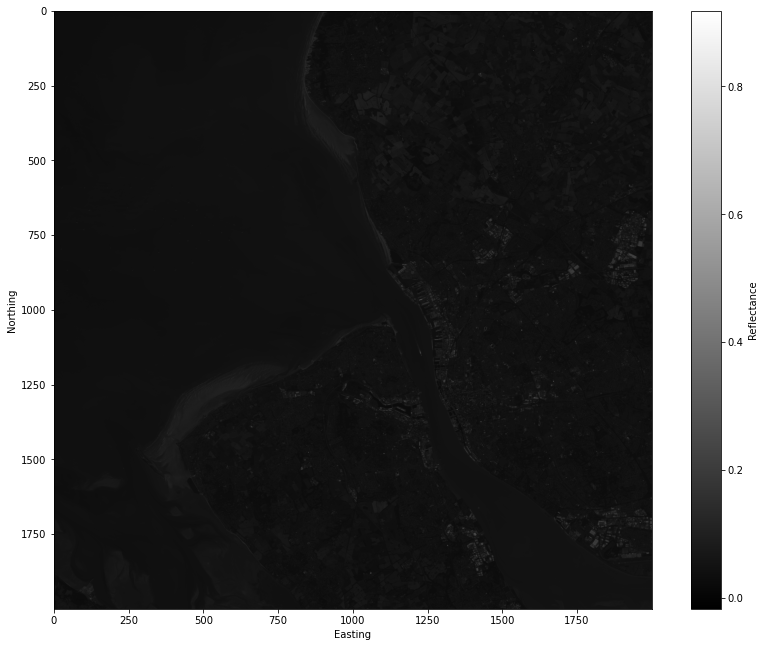

In [12]:
# We can optionally set the figure with the "figsize" argument
plt.figure(figsize=[14, 11])
plt.imshow(image_reflectance, cmap="gray")
# Add a colorbar with the mapping of values to colors
plt.colorbar(label="Reflectance")
plt.xlabel("Easting")
plt.ylabel("Northing")

### Your turn!

Select a 500 x 500 pixel region of this image and plot it using a similar method to what we used above. You can choose the region and the colormap (be creative and explore!).

----

## Image enhancements

Contrast enhancement techniques for grayscale (single band) images:

1. Contrast stretching: increases the contrast of the image by mapping the intensity values of the input image to a new range of values (usually shorter than the original). Function: [skimage.exposure.rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity)
2. Histogram equalization: enhances the contrast of images by transforming the intensity values of an image so that the histogram of the output image approximately matches a specified distribution (for example, a uniform distribution). Function: [skimage.exposure.equalize_hist](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_hist)
3. Adaptive histogram equalization: operates on small data regions (tiles) rather than the entire image. Each tile's contrast is enhanced so that the histogram of each output region approximately matches the specified distribution. Function: [skimage.exposure.equalize_adapthist](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_adapthist)

These enhancements are used to aid the *visualization* of images. **Be careful to always preserve the original and communicate that you have processed the images.** 

**The enhanced versions are usually not suitable for quantitative analysis (why is that?).**


### Contrast stretching 

Stretches the values of the image to a new interval defined by us. Can be used to limit the effect of very bright or very dim pixels.

In [13]:
# We need to load the "exposure" module from scikit-image
import skimage.exposure
# We'll also use numpy
import numpy as np

Calculate the maximum and minimum reflectance:

In [14]:
print("Max:", np.max(image_reflectance))
print("Min:", np.min(image_reflectance))

Max: 0.9183200000000001
Min: -0.017240000000000005


Stretch the contrast by providing manually the new reflectance limits.

In [15]:
# Note that the in_range needs to be defined with () not [] 
# Google "Python tuple" to find out more
image_rescaled_manual = skimage.exposure.rescale_intensity(image_reflectance, in_range=(0, 0.2))

Text(0, 0.5, 'Northing')

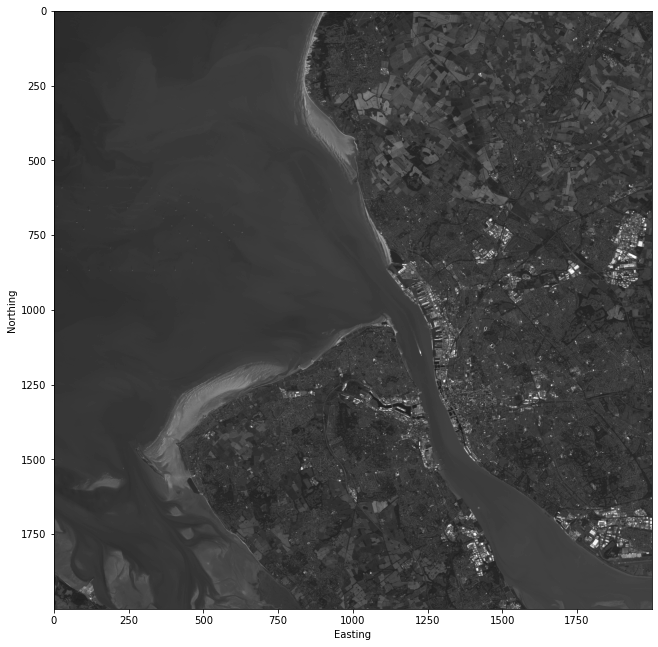

In [16]:
# We can optionally set the figure with the "figsize" argument
plt.figure(figsize=[14, 11])
plt.imshow(image_rescaled_manual, cmap="gray")
# The colorbar is no longer relevant because the 
# rescaled values aren't reflectance anymore.
plt.xlabel("Easting")
plt.ylabel("Northing")

We can do this more quantitavely by using the `numpy.percentile` function.

In [17]:
np.percentile?

Signature:
np.percentile(
    a,
    q,
    axis=None,
    out=None,
    overwrite_input=False,
    interpolation='linear',
    keepdims=False,
)
Docstring:
Compute the q-th percentile of the data along the specified axis.

Returns the q-th percentile(s) of the array elements.

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
q : array_like of float
    Percentile or sequence of percentiles to compute, which must be between
    0 and 100 inclusive.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the percentiles are computed. The
    default is to compute the percentile(s) along a flattened
    version of the array.

    .. versionchanged:: 1.9.0
        A tuple of axes is supported
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output,
    but the type (of the output) will be cast if necessary.
overwrite_input : b

In [18]:
max_range = np.percentile(image_reflectance, 95)
min_range = np.percentile(image_reflectance, 5)
image_rescaled = skimage.exposure.rescale_intensity(image_reflectance, in_range=(min_range, max_range))

Text(0, 0.5, 'Northing')

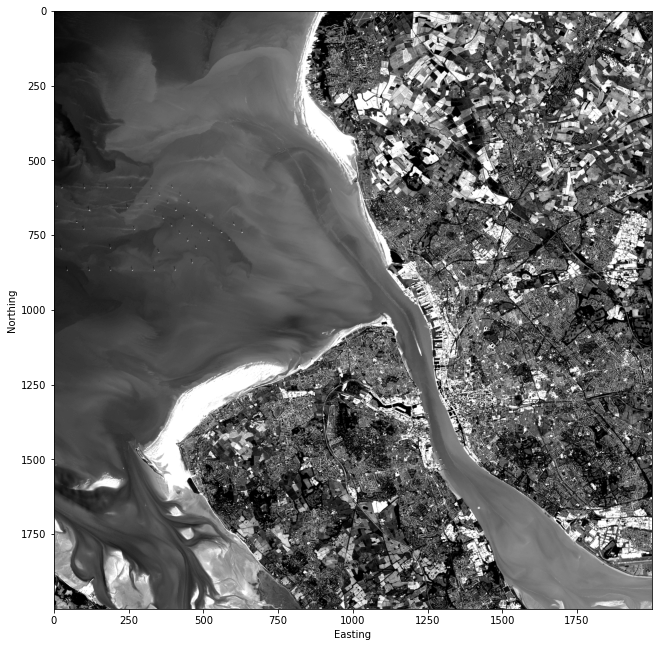

In [19]:
plt.figure(figsize=[14, 11])
plt.imshow(image_rescaled, cmap="gray")
plt.xlabel("Easting")
plt.ylabel("Northing")

Where is this image from? Recognize any landmarks? **Make some plots of smaller regions to explore the image.**

### Your turn!

Apply histogram equalization (normal and adaptive) to the image. Make figures to compare the results and think about what are the trade-offs for each of them. 